Ranosuke

In [15]:
import yfinance as yf
import pandas as pd

# Define the tickers for the assets
tickers = ['GLD', 'AMZN', 'AAPL', 'WMT', 'VNQ', 'AGG']  # Proxies for gold, Amazon, Apple, Walmart, US REITs, and US Bonds

# Define the start and end dates
start_date = '2017-11-01'
end_date = '2023-12-31'

# Fetch the historical data and store close prices in a dictionary
close_prices = {}

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    # Resample the data to get the last price of each month
    monthly_data = data['Adj Close'].resample('M').last()
    close_prices[ticker] = monthly_data

# Convert the dictionary into a DataFrame
monthly_close_df = pd.DataFrame(close_prices)

# Reset the index to make the date a column
monthly_close_df.reset_index(inplace=True)
monthly_close_df.rename(columns={'Date': 'Month'}, inplace=True)

# Show the DataFrame
print(monthly_close_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

       Month         GLD       AMZN       AAPL        WMT        VNQ  \
0 2017-11-30  121.099998  58.837502  40.574173  28.882467  66.056244   
1 2017-12-31  123.650002  58.473499  39.955578  29.488590  65.958885   
2 2018-01-31  127.650002  72.544502  39.530605  31.832745  63.152950   
3 2018-02-28  125.000000  75.622498  42.226009  26.878654  58.304214   
4 2018-03-31  125.790001  72.366997  39.774746  26.726494  60.572689   

         AGG  
0  93.278236  
1  93.721443  
2  92.667068  
3  91.732300  
4  92.347969  


In [16]:
# monthly_close_df to csv named 'Ranosuke.csv'
monthly_close_df.to_csv('Ranosuke.csv', index=False)

In [17]:
# 'AMZN', 'AAPL', 'WMT', 'VNQ'
import yfinance as yf
import pandas as pd

# Define the crypto tickers for the assets
# These are the symbols used on Yahoo Finance for the cryptocurrencies
tickers = ['AMZN', 'AAPL', 'WMT', 'VNQ','BTC-USD', 'ETH-USD', 'XRP-USD', 'DOGE-USD', 'LTC-USD']  

# Define the start and end dates
start_date = '2017-11-01'
end_date = '2023-12-31'

# Fetch the historical data and store close prices in a dictionary
close_prices = {}

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    # Resample the data to get the last price of each month
    monthly_data = data['Adj Close'].resample('M').last()
    close_prices[ticker] = monthly_data

# Convert the dictionary into a DataFrame
monthly_close_df = pd.DataFrame(close_prices)

# Reset the index to make the date a column and rename it to 'Month'
monthly_close_df.reset_index(inplace=True)
monthly_close_df.rename(columns={'Date': 'Month'}, inplace=True)

# Show the DataFrame
print(monthly_close_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

       Month       AMZN       AAPL        WMT        VNQ       BTC-USD  \
0 2017-11-30  58.837502  40.574173  28.882467  66.056244  10233.599609   
1 2017-12-31  58.473499  39.955578  29.488590  65.958885  14156.400391   
2 2018-01-31  72.544502  39.530605  31.832745  63.152950  10221.099609   
3 2018-02-28  75.622498  42.226009  26.878654  58.304214  10397.900391   
4 2018-03-31  72.366997  39.774746  26.726494  60.572689   6973.529785   

       ETH-USD   XRP-USD  DOGE-USD     LTC-USD  
0   447.114014  0.250878  0.002079   88.330704  
1   756.732971  2.300570  0.008972  232.095993  
2  1118.310059  1.162390  0.006010  163.350998  
3   855.198975  0.904583  0.006018  202.895004  
4   396.457001  0.512353  0.002819  116.607002  


In [18]:
# monthly_close_df to csv named 'Gray.csv'
monthly_close_df.to_csv('Gray.csv', index=False)

[*********************100%%**********************]  1 of 1 completed

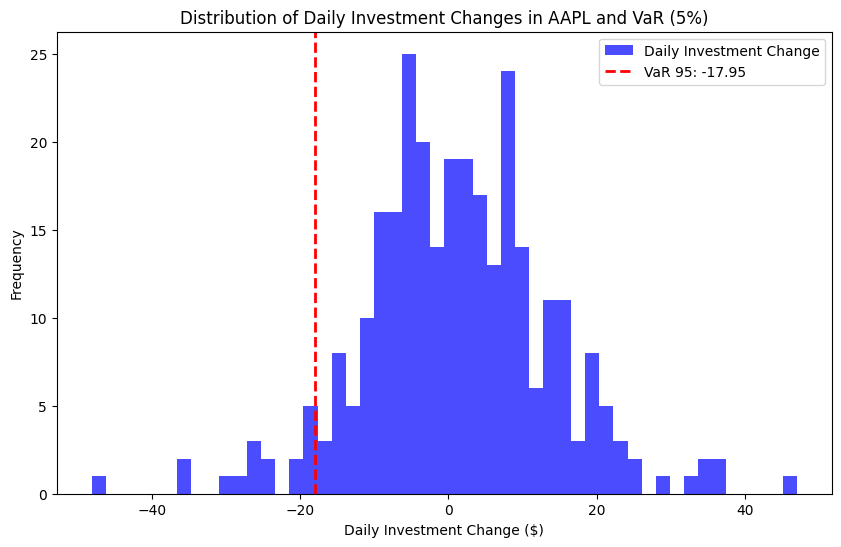

-17.948022920712987

In [23]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download AAPL data
data = yf.download('AAPL', start='2023-01-01', end='2024-03-10')

# Calculate daily returns
data['Daily Returns'] = data['Adj Close'].pct_change()

# Assume we invest $1000 everyday, calculate daily changes in investment
data['Daily Investment Change'] = 1000 * data['Daily Returns']

# Calculate historical VaR (Value at Risk) at the 5% level
VaR_95 = data['Daily Investment Change'].quantile(0.05)

# Assuming 'data' contains your DataFrame and 'VaR_95' is calculated as shown earlier
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Daily Investment Change'
plt.hist(data['Daily Investment Change'].dropna(), bins=50, alpha=0.7, color='blue', label='Daily Investment Change')

# Plot the VaR 95 line and add a label for the legend
plt.axvline(VaR_95, color='r', linestyle='dashed', linewidth=2, label=f'VaR 95: {VaR_95:.2f}')

# Add the legend to the plot
plt.legend(loc='upper right')

plt.title('Distribution of Daily Investment Changes in AAPL and VaR (5%)')
plt.xlabel('Daily Investment Change ($)')
plt.ylabel('Frequency')

plt.show()

VaR_95


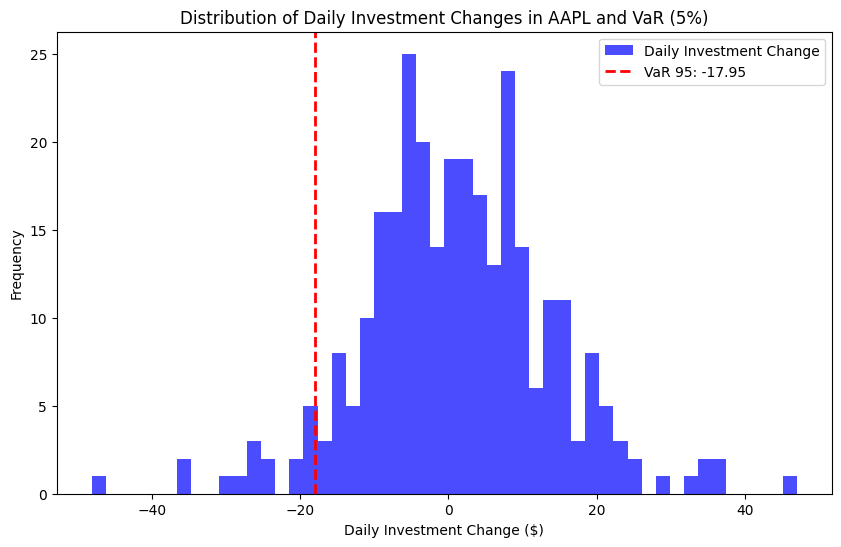

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' contains your DataFrame and 'VaR_95' is calculated as shown earlier
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Daily Investment Change'
plt.hist(data['Daily Investment Change'].dropna(), bins=50, alpha=0.7, color='blue', label='Daily Investment Change')

# Plot the VaR 95 line and add a label for the legend
plt.axvline(VaR_95, color='r', linestyle='dashed', linewidth=2, label=f'VaR 95: {VaR_95:.2f}')

# Add the legend to the plot
plt.legend(loc='upper right')

plt.title('Distribution of Daily Investment Changes in AAPL and VaR (5%)')
plt.xlabel('Daily Investment Change ($)')
plt.ylabel('Frequency')

plt.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


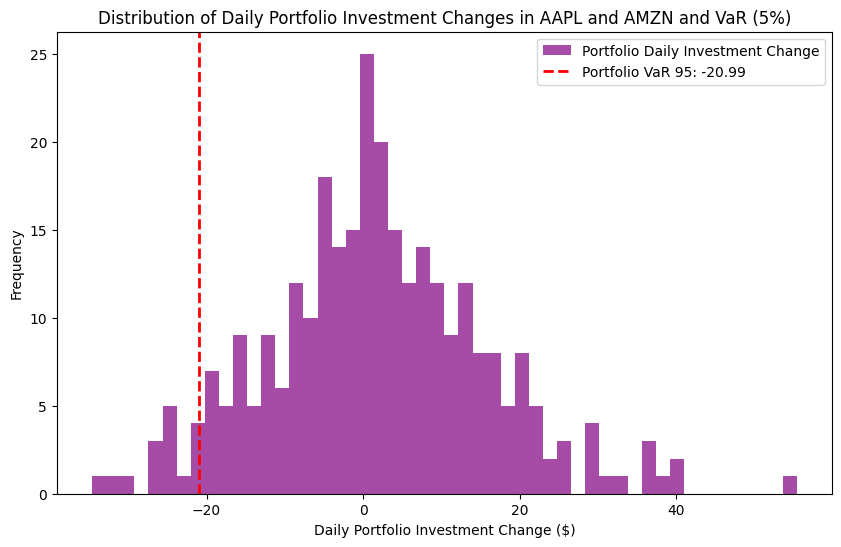

Combined Portfolio VaR 95: $-20.99


In [24]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download AAPL and AMZN data
aapl_data = yf.download('AAPL', start='2023-01-01', end='2024-03-10')
amzn_data = yf.download('AMZN', start='2023-01-01', end='2024-03-10')

# Calculate daily returns for both AAPL and AMZN
aapl_data['Daily Returns'] = aapl_data['Adj Close'].pct_change()
amzn_data['Daily Returns'] = amzn_data['Adj Close'].pct_change()

# Assume we invest $500 everyday in each stock, calculate daily changes in investment
aapl_data['Daily Investment Change'] = 500 * aapl_data['Daily Returns']
amzn_data['Daily Investment Change'] = 500 * amzn_data['Daily Returns']

# Create a combined DataFrame for the investment changes
combined_data = pd.DataFrame({
    'AAPL': aapl_data['Daily Investment Change'],
    'AMZN': amzn_data['Daily Investment Change']
})

# Calculate the daily portfolio change by summing the daily changes in AAPL and AMZN
combined_data['Portfolio Change'] = combined_data.sum(axis=1)

# Calculate historical VaR (Value at Risk) at the 5% level for the combined portfolio
VaR_95 = combined_data['Portfolio Change'].quantile(0.05)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Portfolio Change'
plt.hist(combined_data['Portfolio Change'].dropna(), bins=50, alpha=0.7, color='purple', label='Portfolio Daily Investment Change')

# Plot the VaR 95 line and add a label for the legend
plt.axvline(VaR_95, color='r', linestyle='dashed', linewidth=2, label=f'Portfolio VaR 95: {VaR_95:.2f}')

# Add the legend to the plot
plt.legend(loc='upper right')

plt.title('Distribution of Daily Portfolio Investment Changes in AAPL and AMZN and VaR (5%)')
plt.xlabel('Daily Portfolio Investment Change ($)')
plt.ylabel('Frequency')

plt.show()

print(f"Combined Portfolio VaR 95: ${VaR_95:.2f}")


[*********************100%%**********************]  3 of 3 completed


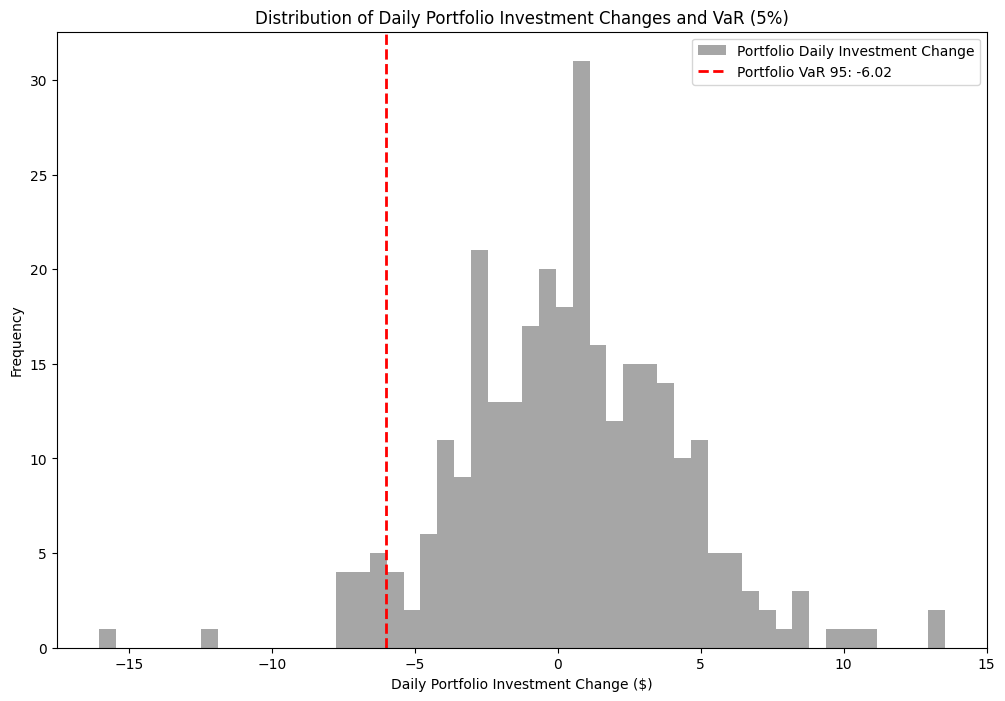

Portfolio VaR 95: $-6.02


In [34]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbols for the assets
tickers = ['WMT', 'AGG', 'GLD',]

# Download historical data for all tickers
data = yf.download(tickers, start='2023-01-01', end='2024-03-10')['Adj Close']

# Calculate daily returns for all assets
daily_returns = data.pct_change()

# Assume we invest $250 in each asset daily, calculate the daily change in investment
daily_investment_changes = daily_returns * 250

# Sum the daily changes across all assets to get the portfolio daily change
daily_investment_changes['Portfolio Change'] = daily_investment_changes.sum(axis=1)

# Calculate historical VaR (Value at Risk) at the 5% level for the portfolio
VaR_95 = daily_investment_changes['Portfolio Change'].quantile(0.05)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the distribution of 'Portfolio Change'
plt.hist(daily_investment_changes['Portfolio Change'].dropna(), bins=50, alpha=0.7, color='grey', label='Portfolio Daily Investment Change')

# Plot the VaR 95 line and add a label for the legend
plt.axvline(VaR_95, color='r', linestyle='dashed', linewidth=2, label=f'Portfolio VaR 95: {VaR_95:.2f}')

# Add the legend to the plot
plt.legend(loc='upper right')

plt.title('Distribution of Daily Portfolio Investment Changes and VaR (5%)')
plt.xlabel('Daily Portfolio Investment Change ($)')
plt.ylabel('Frequency')

plt.show()

# Output the VaR value
print(f"Portfolio VaR 95: ${VaR_95:.2f}")
